In [29]:
import pandas as pd
import numpy as np
from plotnine import *

In [30]:
# Opening population data
df_pop = pd.read_csv('../20_intermediate_files/state county population.csv', index_col=None)
df_pop = df_pop.drop('Year Code', axis = 1)
df_pop['state_code'] = df_pop["County"].str[-2:]
df_pop['county_name_only'] = df_pop["County"].str[:-11]
df_pop.head(2)

,State,State Code,County,County Code,Year,Population,state_code,county_name_only
0,Alabama,1,"Autauga County, AL",1001,1999,42963,AL,Autauga
1,Alabama,1,"Autauga County, AL",1001,2000,43671,AL,Autauga


In [3]:
df_pop['Year'].unique()

array([2009, 2010, 2011, 2012, 2013, 2014], dtype=int64)

In [4]:
# Random checking to make sure we have the states
(df_pop['State']=='Washington').value_counts()

False    2115
True      116
Name: State, dtype: int64

In [31]:
abbrv = ['CA','NV','NY','TX','HI','IA','KS','ME','MA','MN','MT','NE','ND','OR','SD','VA','WY','AR','GA','MS', 'FL', 'WA']
df_pop = df_pop.loc[df_pop['state_code'].isin(abbrv),:]
df_pop.sample(5)

,State,State Code,County,County Code,Year,Population,state_code,county_name_only
30189,Minnesota,27,"Rice County, MN",27131,2009,63859,MN,Rice
4777,California,6,"Riverside County, CA",6065,2014,2329271,CA,Riverside
64674,Washington,53,"Kittitas County, WA",53037,2012,41672,WA,Kittitas
36080,Montana,30,"Valley County, MT",30105,2001,7587,MT,Valley
63657,Virginia,51,"Falls Church city, VA",51610,2007,10947,VA,Falls Chur


In [32]:
# Opening perscription data
df_pres = pd.read_csv('../20_intermediate_files/prescription_data_grouped_1.csv')
(df_pres['MME']==0).value_counts()
df_pres["T_YEAR"].unique()

array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014], dtype=int64)

In [33]:
# Dropping unnecessary columns
df_pop = df_pop.drop(["State Code", "County", 'County Code'], axis=1)

In [27]:
df_pop.head(2)

,State,Year,Deaths,Population,State_Code,county_name_only
241,Arkansas,2009,12.0,216620.0,AR,Benton
242,Arkansas,2010,12.0,221339.0,AR,Benton


In [34]:
# Creating filter column for population df
df_pop_grouped = df_pop.groupby(['Year', 'State', 'state_code', 'county_name_only']).sum().reset_index()
df_pop_grouped['county_name_only'] = df_pop_grouped['county_name_only'].str.lower()
df_pop_grouped['Year_string'] = df_pop_grouped['Year'].astype('str')
df_pop_grouped['filter'] = df_pop_grouped['state_code'] + df_pop_grouped['county_name_only'] + df_pop_grouped['Year_string']
df_pop_grouped

,Year,State,state_code,county_name_only,Population,Year_string,filter
0,1999,Arkansas,AR,arkansas,20966,1999,ARarkansas1999
1,1999,Arkansas,AR,ashley,24261,1999,ARashley1999
2,1999,Arkansas,AR,baxter,38055,1999,ARbaxter1999
3,1999,Arkansas,AR,benton,148636,1999,ARbenton1999
4,1999,Arkansas,AR,boone,33436,1999,ARboone1999
...,...,...,...,...,...,...,...
34628,2020,Wyoming,WY,sweetwater,42673,2020,WYsweetwater2020
34629,2020,Wyoming,WY,teton,23497,2020,WYteton2020
34630,2020,Wyoming,WY,uinta,20215,2020,WYuinta2020
34631,2020,Wyoming,WY,washakie,7760,2020,WYwashakie2020


In [35]:
# Filtering year and lowercase county name
df_pop = df_pop.loc[(df_pop['Year']>2008) & (df_pop['Year']<=2014)]
df_pop['county_name_only'] = df_pop['county_name_only'].str.lower()

df_pres = df_pres.loc[(df_pres['T_YEAR']>2008) & (df_pres['T_YEAR']<=2014)]
df_pres['county_name_only'] = df_pres['BUYER_COUNTY'].str.lower()

In [36]:
# Grouping prescription df to avoid duplicate state and county name
df_pres_grouped = df_pres.groupby(['BUYER_STATE', 'BUYER_COUNTY', 'T_YEAR', 'county_name_only']).sum().reset_index()
df_pres_grouped

,BUYER_STATE,BUYER_COUNTY,T_YEAR,county_name_only,MME
0,AR,ACCOMACK,2009,accomack,0.0
1,AR,ACCOMACK,2010,accomack,0.0
2,AR,ACCOMACK,2011,accomack,0.0
3,AR,ACCOMACK,2012,accomack,0.0
4,AR,ACCOMACK,2013,accomack,0.0
...,...,...,...,...,...
144667,WY,ZAVALA,2010,zavala,0.0
144668,WY,ZAVALA,2011,zavala,0.0
144669,WY,ZAVALA,2012,zavala,0.0
144670,WY,ZAVALA,2013,zavala,0.0


In [37]:
# Creating filter column for population df
df_pres_grouped['Year'] = df_pres_grouped['T_YEAR'].astype('str')
df_pres_grouped['filter'] = df_pres_grouped['BUYER_STATE'] + df_pres_grouped['county_name_only'] + df_pres_grouped['Year']
df_pres_grouped.loc[df_pres_grouped['BUYER_STATE']=='FL']


,BUYER_STATE,BUYER_COUNTY,T_YEAR,county_name_only,MME,Year,filter
13152,FL,ACCOMACK,2009,accomack,0.0,2009,FLaccomack2009
13153,FL,ACCOMACK,2010,accomack,0.0,2010,FLaccomack2010
13154,FL,ACCOMACK,2011,accomack,0.0,2011,FLaccomack2011
13155,FL,ACCOMACK,2012,accomack,0.0,2012,FLaccomack2012
13156,FL,ACCOMACK,2013,accomack,0.0,2013,FLaccomack2013
...,...,...,...,...,...,...,...
19723,FL,ZAVALA,2010,zavala,0.0,2010,FLzavala2010
19724,FL,ZAVALA,2011,zavala,0.0,2011,FLzavala2011
19725,FL,ZAVALA,2012,zavala,0.0,2012,FLzavala2012
19726,FL,ZAVALA,2013,zavala,0.0,2013,FLzavala2013


In [38]:
# filtering the data to only county and state exist in population data
df_pres_grouped.loc[df_pres_grouped['filter'].isin(df_pop_grouped['filter']),:]

,BUYER_STATE,BUYER_COUNTY,T_YEAR,county_name_only,MME,Year,filter
180,AR,ARKANSAS,2009,arkansas,6643.993312,2009,ARarkansas2009
181,AR,ARKANSAS,2010,arkansas,7564.533495,2010,ARarkansas2010
182,AR,ARKANSAS,2011,arkansas,7502.461643,2011,ARarkansas2011
183,AR,ARKANSAS,2012,arkansas,8032.757680,2012,ARarkansas2012
184,AR,ARKANSAS,2013,arkansas,7333.509152,2013,ARarkansas2013
...,...,...,...,...,...,...,...
144361,WY,WESTON,2010,weston,2074.412212,2010,WYweston2010
144362,WY,WESTON,2011,weston,2103.821850,2011,WYweston2011
144363,WY,WESTON,2012,weston,2062.901850,2012,WYweston2012
144364,WY,WESTON,2013,weston,2008.627804,2013,WYweston2013


In [39]:
# dropping unnecessary columns
df_pop_grouped = df_pop_grouped.drop(['Year_string', 'filter'], axis=1)
df_pres_grouped = df_pres_grouped.drop(['Year', 'filter'], axis=1)

In [41]:
# Merge both dataframe into merged_df
merged_df = df_pop_grouped.merge(df_pres_grouped, left_on=["Year","state_code","county_name_only"], right_on=["T_YEAR","BUYER_STATE","county_name_only"])
# merged_df = merged_df.drop(["BUYER_STATE", "BUYER_COUNTY", "Year"], axis=1)

In [42]:
# Checking value below 10 (small value of mme seems irrelevant)
merged_df.loc[merged_df['MME']<10,:]

,Year,State,state_code,county_name_only,Population,BUYER_STATE,BUYER_COUNTY,T_YEAR,MME
12,2009,Arkansas,AR,cleveland,8649,AR,CLEVELAND,2009,0.0000
143,2009,Florida,FL,desoto,34592,FL,DESOTO,2009,0.0000
199,2009,Georgia,GA,baker,3560,GA,BAKER,2009,0.0000
255,2009,Georgia,GA,glascock,3066,GA,GLASCOCK,2009,0.0000
311,2009,Georgia,GA,quitman,2497,GA,QUITMAN,2009,0.0000
...,...,...,...,...,...,...,...,...,...
8747,2014,Texas,TX,schleicher,3162,TX,SCHLEICHER,2014,0.0000
8756,2014,Texas,TX,sterling,1339,TX,STERLING,2014,0.0000
8763,2014,Texas,TX,throckmorton,1608,TX,THROCKMORTON,2014,0.0000
8841,2014,Virginia,VA,king and queen,7175,VA,KING AND QUEEN,2014,0.6054


In [43]:
merged_df['Population'] = merged_df.Population.astype('int')

In [44]:
# defining control states
we_want_washington = ['Hawaii', 'Iowa', 'Kansas', 'Maine', 'Massachusetts',
       'Minnesota', 'Montana', 'Nebraska', 'North Dakota', 'Oregon',
       'South Dakota', 'Virginia', 'Wyoming']
we_want_florida = ['Nevada', 'New York', 'California']

df_washington = merged_df[merged_df['State'].isin(we_want_washington)]
df_florida = merged_df[merged_df['State'].isin(we_want_florida)]

In [45]:
df_washington

,Year,State,state_code,county_name_only,Population,BUYER_STATE,BUYER_COUNTY,T_YEAR,MME
352,2009,Hawaii,HI,hawaii,183629,HI,HAWAII,2009,70120.249951
353,2009,Hawaii,HI,honolulu,943177,HI,HONOLULU,2009,142647.388839
354,2009,Hawaii,HI,kauai,66518,HI,KAUAI,2009,44348.058012
355,2009,Hawaii,HI,maui,153300,HI,MAUI,2009,93640.833898
356,2009,Iowa,IA,adair,7676,IA,ADAIR,2009,1373.040080
...,...,...,...,...,...,...,...,...,...
8943,2014,Wyoming,WY,sweetwater,45010,WY,SWEETWATER,2014,23906.007735
8944,2014,Wyoming,WY,teton,22930,WY,TETON,2014,3435.514794
8945,2014,Wyoming,WY,uinta,20904,WY,UINTA,2014,11152.284428
8946,2014,Wyoming,WY,washakie,8322,WY,WASHAKIE,2014,7433.758013


In [46]:
# Grouping control state
groupedby_df_washington = df_washington.groupby(["Year"]).sum() 
groupedby_df_washington = groupedby_df_washington.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
groupedby_df_washington['Prescription_Rate'] = (groupedby_df_washington['MME']/groupedby_df_washington['Population'])*100_000

groupedby_df_washington['Policy_Change'] = "Control"

In [47]:
groupedby_df_washington

,Year,Population,T_YEAR,MME,Prescription_Rate,Policy_Change
0,2009,34143953,1420363,9.612925e+06,28154.105513,Control
1,2010,34363965,1423080,1.035920e+07,30145.529793,Control
2,2011,34661830,1421777,1.098800e+07,31700.575393,Control
3,2012,34941830,1424496,1.125117e+07,32199.706833,Control
4,2013,35216734,1427217,1.092006e+07,31008.143426,Control
5,2014,35491477,1425912,1.072623e+07,30221.977875,Control


In [48]:
# Grouping treatment state
we_want_only_washington = ['Washington']

df_only_washington = merged_df[merged_df['State'].isin(we_want_only_washington)]

groupedby_df_only_washington = df_only_washington.groupby(["Year"]).sum() 
groupedby_df_only_washington = groupedby_df_only_washington.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
groupedby_df_only_washington['Prescription_Rate'] = (groupedby_df_only_washington['MME']/groupedby_df_only_washington['Population'])*100_000

groupedby_df_only_washington['Policy_Change'] = "Treatment"

In [49]:
groupedby_df_only_washington

,Year,Population,T_YEAR,MME,Prescription_Rate,Policy_Change
0,2009,6667426,78351,2.484832e+06,37268.230362,Treatment
1,2010,6724540,78390,2.537823e+06,37739.722107,Treatment
2,2011,6830038,78429,2.514218e+06,36811.191979,Treatment
3,2012,6897012,78468,2.454681e+06,35590.506158,Treatment
4,2013,6971406,78507,2.421293e+06,34731.775380,Treatment
5,2014,7061530,78546,2.461993e+06,34864.862215,Treatment


In [50]:
# function to make ggplot for Washington
def diffIndiff_wa(
    prepolicy_contr,
    postpolicy_contr,
    prepolicy_treatment,
    postpolicy_treatment,
    xvar,
    yvar,
    policyyear,
):
    dd = (
        ggplot()
        # plot all chosen states,  pre policy year
        + geom_smooth(
            prepolicy_contr,
            aes(x=xvar, y=yvar, color="Policy_Change"),
            method="lm",
        )
        # plot all chosen states, post policy year
        + geom_smooth(
            postpolicy_contr,
            aes(x=xvar, y=yvar, color="Policy_Change"),
            method="lm",
        )
        # plot treatment, pre policy year
        + geom_smooth(
            prepolicy_treatment,
            aes(x=xvar, y=yvar, color="Policy_Change"),
            method="lm",
        )
        # plot treatment, post policy year
        + geom_smooth(
            postpolicy_treatment,
            aes(x=xvar, y=yvar, color="Policy_Change"),
            method="lm",
        )
        + geom_vline(xintercept=policyyear, linetype="dotted")
        + xlab("Year")
        # + theme_classic(base_family="Times")
        + scale_x_continuous(breaks=[2009, 2010, 2011, 2012, 2013, 2014], limits=[2009, 2014])
    )
    return dd

def pre_post_wa(prepolicy_treatment, postpolicy_treatment, xvar, yvar, policyyear):
    ppo = (
        ggplot()
        # plot treatment, pre policy year
        + geom_smooth(
            prepolicy_treatment,
            aes(x=xvar, y=yvar),
            method="lm",
        )
        # plot treatment, post policy year
        + geom_smooth(
            postpolicy_treatment,
            aes(x=xvar, y=yvar),
            method="lm",
        )
        + geom_vline(xintercept=policyyear, linetype="dotted")
        + xlab("Year")
        +scale_color_manual(values=["darkturquoise","darkturquoise"])
        # + theme_classic(base_family="Times")
        + scale_x_continuous(breaks=[2009, 2010, 2011, 2012, 2013, 2014], limits=[2009, 2014])
    )
    return ppo

In [51]:
wa_prepol_control = groupedby_df_washington[(groupedby_df_washington['Year']<2012)]
wa_postpol_control = groupedby_df_washington[(groupedby_df_washington['Year']>=2012)]

wa_prepol_treatment = groupedby_df_only_washington [(groupedby_df_only_washington['Year']<2012)]
wa_postpol_treatment = groupedby_df_only_washington[(groupedby_df_only_washington['Year']>=2012)]

c:\Users\wafia\miniconda3\lib\site-packages\plotnine\guides\guides.py:187: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it


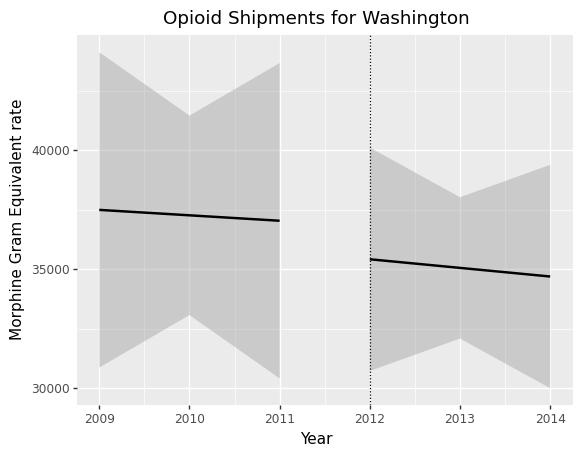

In [52]:
prepos = (
    pre_post_wa(wa_prepol_treatment, wa_postpol_treatment, "Year", "Prescription_Rate", 2012)
    + labs(
        title="Opioid Shipments for Washington"
    )
    + ylab("Morphine Gram Equivalent rate")
)

print(prepos)

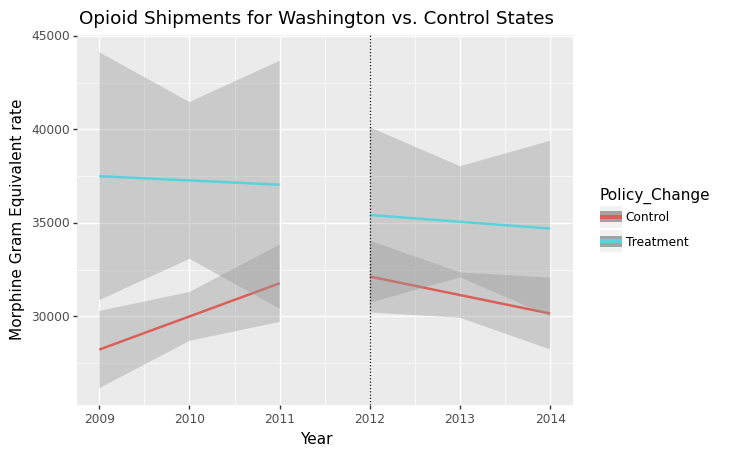

In [53]:
diff = (
    diffIndiff_wa(
        wa_prepol_control, wa_postpol_control, wa_prepol_treatment, wa_postpol_treatment, "Year", "Prescription_Rate", 2012
    )
    + labs(
        title="Opioid Shipments for Washington vs. Control States",
        color="Policy_Change",
    )
    + ylab("Morphine Gram Equivalent rate")
)
print(diff)